# Pre-Run Setup

### Import Libraries

In [1]:
from qiskit import *
import os
import datetime
import numpy as np
from datetime import date
#you have to load some account to start


In [2]:
import random
import os

In [61]:
token0 = '316cca1ff42067b9901b6a9e90ca76496e76b4a73139954176c6fe31a45572fcd37089924cbe5c41edb96a9b4c0e92e44451ed350e2a7e45dc809d26cd752eed'
provider = IBMQ.enable_account(token0)

### Specify the files that need to be run 
The old setup works with only one folder.

In [7]:
def shuffle_qasms(qasmlist):
    def get_time(filename):
        idgate = filename.split('/')[-1].split('_')[7].split('=')[-1]
        return idgate
    print(get_time(qasmlist[0]))
    times = list(set([get_time(x) for x in qasmlist])) #remove duplicates
    times.sort()
    print('# of time instances=%d'%(len(times)))
    random.shuffle(times) #randomize the timesteps
    print(times)
    sorted_qasm_list = []
    for time in times:
        sorted_qasm_list += [f for f in qasmlist if get_time(f) == time]
    return sorted_qasm_list

In [8]:
import glob
from datetime import date
circuitPath = r"../../../Circuits"
device = "ibmqx2"
datestr = "02122020"
runtypes = [f.name for f in os.scandir(circuitPath + '/' + device + '/' + datestr) if f.is_dir() and 'QS_XplusState' in f.name]
batchFiles = []

for runtype in runtypes:
    qasmpath = circuitPath + '/' + device + '/'+ datestr + '/' + runtype + '/'
    qasmlist = glob.glob(qasmpath + '%s*.qasm'%(runtype.split('_')[0]))
    # sort by id gates
    qasmlist.sort(key=lambda x: int(x.split('/')[-1].split('_')[7].split('=')[-1]))
    print(len(qasmlist))
    f=qasmlist[0]
    print(f)
    QuantumCircuit().from_qasm_file(f).draw(output='mpl')
    sorted_qasm_list = shuffle_qasms(qasmlist)
    # add measurement error mitigation
    meas_qasm = glob.glob(qasmpath + '%s*.qasm'%('MeasError'))
    sorted_qasm_list += meas_qasm
    print(len(sorted_qasm_list))
    batchFiles += [sorted_qasm_list]

72
../../../Circuits/ibmqx2/02122020/MeasMainqFree_Q0_ZminusState_QS_XplusState/MeasMainqFree_Q0_ZminusState_QS_XplusState_02122020_ibmqx2_numIdGates=0_obsX.qasm
0
# of time instances=24
['408', '312', '528', '288', '24', '48', '480', '384', '192', '168', '432', '96', '336', '552', '144', '72', '240', '216', '264', '456', '504', '120', '360', '0']
74
72
../../../Circuits/ibmqx2/02122020/MeasMainqFree_Q0_XplusState_QS_XplusState/MeasMainqFree_Q0_XplusState_QS_XplusState_02122020_ibmqx2_numIdGates=0_obsY.qasm
0
# of time instances=24
['504', '456', '216', '336', '96', '264', '360', '408', '48', '144', '384', '168', '24', '120', '288', '312', '528', '72', '192', '0', '240', '552', '432', '480']
74
72
../../../Circuits/ibmqx2/02122020/MeasMainqFree_Q0_YminusState_QS_XplusState/MeasMainqFree_Q0_YminusState_QS_XplusState_02122020_ibmqx2_numIdGates=0_obsZ.qasm
0
# of time instances=24
['288', '48', '192', '504', '0', '552', '264', '240', '168', '528', '432', '384', '456', '24', '336', '360', 

In [9]:
len(batchFiles)

12

../../../Circuits/ibmqx2/02122020/MeasAllFree_Q0_XminusState_QS_XplusState/MeasAllFree_Q0_XminusState_QS_XplusState_02122020_ibmqx2_numIdGates=24_obsZ.qasm


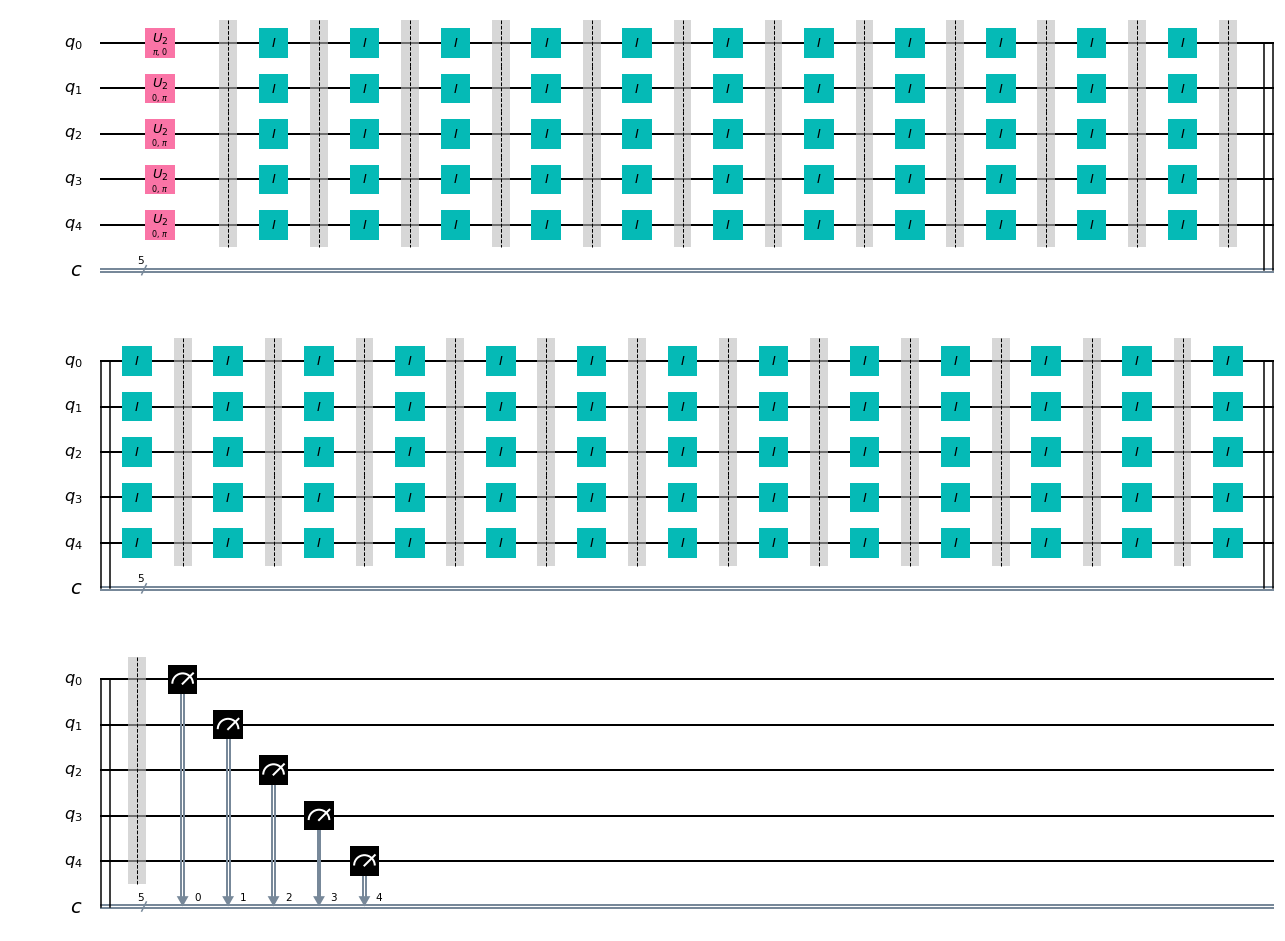

In [10]:
f=qasmlist[5]
print(f)
QuantumCircuit().from_qasm_file(f).draw(output='mpl')

In [47]:
tokens = {'haimeng@usc.edu':'316cca1ff42067b9901b6a9e90ca76496e76b4a73139954176c6fe31a45572fcd37089924cbe5c41edb96a9b4c0e92e44451ed350e2a7e45dc809d26cd752eed',
          'zhanghaimeng1994@gmail.com':'fa1d1dd820b8c41dca1f520f87d61fd0ac47781d41c29bd51a7073f50e45035c2d98dfd5c8c760b9986bf165e6f4a086525a150f409855aa1d63a7ee92ca1172',
          'theireasychair@gmail.com':'1916e345d1c5ff5b05c2f9ad66233ecb947150cf654fd916cc070445e6c5075957639db538d8e9fb21424e2000a50e0d021aaed5bcd7ce60e09a66104e3da071',
          'theireasychair@icloud.com':'5214ab087cb97773b7092258b40fdc4ee602d391b36e866d4e5c6850c41813f7ec5954527846a9ea597f29d3af681601f915c131fc2f99956094f4d4a2d3bbfb',
          'jinweixu@stanford.edu':'6dbc2e530007ad4fcd44abccf232873db3589341cd9d728219c4c97ccc489be727ca3f46412e10a0292f124e895c0e5623471bb1d5c3f54b4eb3bdc9d90e5338'}

Here is a newer setup from Matthew that gets files from multiple folders.

### Specify API and Backend

This script checks for how many jobs are available per token.

In [62]:
#write the email address corresponding to each API, this will help when these APIs expire
apiDict = tokens
apiInv =dict(map(reversed, apiDict.items()))
apitokens = list(apiDict.values())


for token in apitokens:
    IBMQ.disable_account() #Start with no account loaded
    provider = IBMQ.enable_account(token) #Some account must be loaded before we start
    backend = provider.backends.ibmqx2
    available_jobs = backend.job_limit().maximum_jobs - backend.job_limit().active_jobs
    print(f"{available_jobs} jobs available for {apiInv[token]}")



5 jobs available for haimeng@usc.edu
5 jobs available for zhanghaimeng1994@gmail.com
5 jobs available for theireasychair@gmail.com
5 jobs available for theireasychair@icloud.com
5 jobs available for jinweixu@stanford.edu


In [13]:
backend.configuration() #max_experiments=75, max_shots=8192
max_experiments=backend.configuration().max_experiments
max_shots=backend.configuration().max_shots
print(max_experiments,max_shots)

75 8192


# Run the circuits

### Function to import backend and token information during the runs

In [14]:
# print current working directory
print(os.getcwd())

/home/haimeng/LocalProjects/IBM-PMME/IBM_data/job_submission/20201202


In [15]:
runRecords = '../../../Data/records/info/' #information about each job is stored in this folder

if not os.path.exists(os.path.dirname(runRecords)):
    os.makedirs(os.path.dirname(runRecords))
    
def getProp(paramList):
    return ','.join([str(x['value']) for x in paramList])


def exportJobInfo(usertoken, jobid, filenames, backend):
    global runRecords
    now = datetime.datetime.now()
    f= open(f"{runRecords}{jobid}_{usertoken}.txt","w+")
    f.write("TOKEN\n")
    f.write("usertoken,jobid\n")
    f.write(f"{usertoken},{jobid}\n")
    
    backend_info = backend.properties().to_dict() 
    f.write(f"BACKEND \n{backend_info['backend_name']}\n")
    f.write(backend_info['backend_version'] + '\n')
    f.write(backend_info['last_update_date'] + '\n' )
    
    
    f.write("GATES\n")
#     print(backend_info['qubits'])
    #get the name of all the gate parameters and the units for these parameters
    f.write('name,' + ','.join([f"{x['name']}_in_{x['unit']}" for x in backend_info['gates'][0]['parameters'] ]) + '\n')
    
    #now print them for each gate for the backend, this includes both 1 and 2 qubit gates
    for gate in backend_info['gates']:
        f.write(f"{gate['name']},{getProp(gate['parameters'])}"  + '\n')
    
    f.write("QUBITS\n")
    #get the name of all the gate parameters and the units for these parameters
    f.write('number,' + ','.join([f"{x['name']}_in_{x['unit']}" for x in backend_info['qubits'][0]]) + '\n')
    for q in range(0, len(backend_info['qubits'])):
        qubitProps = backend_info['qubits'][q]
        f.write(f"{q}, {getProp(qubitProps)}"  + '\n')

    f.write("CIRCUITS\n")
    for fname in filenames:
        f.write(f"{fname}\n")
    f.close()
    return None

#test
#exportJobInfo('a', 'c', batchFiles[0], backend)

### Function to check for available tokens

In [16]:

 
#Select a available token to send the run to
#With the current setup, loading and unloading a token takes sometime
#sequentially check each token for availability will increase loadtime for tokens that are near the end
#so given a list of tokens, everytime a job is sent to a token, that token will be sent to the end
def availableToken():
    global provider, backend, apitokens
    token = apitokens[0]
    available_jobs = backend.job_limit().maximum_jobs - backend.job_limit().active_jobs
    if available_jobs > 1:
        print(f'{available_jobs} jobs available for {apiInv[token]}')
        return token

    #if the first token has no availability then we will continue below
    apitokens.append(apitokens.pop(0))
    for token in apitokens:
        IBMQ.disable_account() 
        provider = IBMQ.enable_account(token) 
        backend = provider.backends.ibmqx2
        available_jobs = backend.job_limit().maximum_jobs - backend.job_limit().active_jobs
        if available_jobs > 1:
            print(f'{available_jobs} jobs available for {apiInv[token]}')
            apitokens.insert(0, apitokens.pop(apitokens.index(token)))
            return token

availableToken()   
      

5 jobs available for theireasychair@icloud.com


'7a265cd47bf57c072146f15d1967eb165b9704352fc4e4736f2b4f64bb8ff2462be10301cc127739a5a7aa4333e07b52c304e6b452ddc6b15d9c5c2056ef2a13'

### Actually doing the runs

In [17]:
#start with empty containers
#dont run this block if you already have a list of runs you want to continue

runDict = {} #matches each batch to the job token
jobDict = {} #matches each batch to the entire job object
jobsFound = set([]) #status is updated when checked
jobsDone = set([])

In [33]:
jobsFound

{0, 1, 2, 3, 4, 5, 6, 7}

In [49]:
#start runs
#generally we want to run all the batchFiles, but we can also choose to run only some of them:
#todoFiles = [batchFiles[3]]
jobsNotFound = list(set(range(0, len(batchFiles))) - jobsFound)

# todoFiles = batchFiles[0::]
# for runFiles in todoFiles:
for n in jobsNotFound[0::]:
    try:
        runFiles = batchFiles[n]
        token = availableToken()

        allQasmList = [QuantumCircuit.from_qasm_file(file) for file in runFiles] #this needs to edited if the batch files also contain directory
        allCircuits= assemble(allQasmList, backend, shots=8192)

        job_current = backend.run(allCircuits)
        print(job_current.status())

        runId = job_current.job_id()
    #     runTokens.append(token)
    #     runIds.append(runId)
        runDict[batchFiles.index(runFiles)] = [token, runId] #note that the index still refers to the original batchFiles

        #as retrieve job is not working temporarily I will save job_current in a dictionary as well
        jobDict[batchFiles.index(runFiles)] = job_current
        print(f"Batch {batchFiles.index(runFiles)} has been sent")

        exportJobInfo(token, runId, batchFiles[0], backend)
    except:
        pass

print(runDict)

5 jobs available for haimeng@usc.edu
JobStatus.VALIDATING
Batch 8 has been sent
4 jobs available for haimeng@usc.edu
JobStatus.VALIDATING
Batch 9 has been sent
3 jobs available for haimeng@usc.edu
JobStatus.VALIDATING
Batch 10 has been sent
2 jobs available for haimeng@usc.edu
JobStatus.VALIDATING
Batch 11 has been sent
{0: ['7a265cd47bf57c072146f15d1967eb165b9704352fc4e4736f2b4f64bb8ff2462be10301cc127739a5a7aa4333e07b52c304e6b452ddc6b15d9c5c2056ef2a13', '5fc7cb5b68497e001a4afefb'], 1: ['7a265cd47bf57c072146f15d1967eb165b9704352fc4e4736f2b4f64bb8ff2462be10301cc127739a5a7aa4333e07b52c304e6b452ddc6b15d9c5c2056ef2a13', '5fc7cb75ce62e6001a5bcb99'], 2: ['7a265cd47bf57c072146f15d1967eb165b9704352fc4e4736f2b4f64bb8ff2462be10301cc127739a5a7aa4333e07b52c304e6b452ddc6b15d9c5c2056ef2a13', '5fc7cb8b26d87e0019d52856'], 3: ['7a265cd47bf57c072146f15d1967eb165b9704352fc4e4736f2b4f64bb8ff2462be10301cc127739a5a7aa4333e07b52c304e6b452ddc6b15d9c5c2056ef2a13', '5fc7cba2334e30001a0931fc'], 4: ['316cca1ff420

In [30]:
jobsDone

{0, 1, 2, 3, 4, 5, 6, 7}

In [36]:
runDict[8]

['7a265cd47bf57c072146f15d1967eb165b9704352fc4e4736f2b4f64bb8ff2462be10301cc127739a5a7aa4333e07b52c304e6b452ddc6b15d9c5c2056ef2a13',
 '5fc7ea7cf1eb23001a91bcf6']

### Checking job status

In [54]:
# import sleep
jobsNotDone = list(set(runDict.keys()) - jobsDone)

def loadToken(token):
    global provider, backend
    if(not IBMQ.active_account()):
        IBMQ.load_account()
    IBMQ.disable_account() 
    provider = IBMQ.enable_account(token) 
    backend = provider.backends.ibmqx2
    return None

print("|Batch| Q#  | Status")
for job in jobsNotDone:
    #try:
    [token, job_id] = runDict[job]
    loadToken(token)

    #get job from dictionary instead of retrieve job as that function is broken for now
#         job_data = backend.retrieve_job(job_id)
    #alternatively get job from the jobDict
    if job in jobDict:
        job_data = jobDict[job]
    else:
        job_data = backend.retrieve_job(job_id)
    #print(f"Batch {job} is {job_data.status()}")

    jobsFound.add(job)
    qno = '---'
    if str(job_data.status()) == 'JobStatus.QUEUED':
        #print(f'queue number is {job_data.queue_info().position}')
        qno = str(job_data.queue_info().position).zfill(3)

    if str(job_data.status()) == 'JobStatus.DONE':
        jobsDone.add(job)

    st = str(job_data.status()).split('.')[1]
    jno = str(job).zfill(3)
    print(f'| {jno} | {qno} | {st}')
    #except:
    #    pass

print(f'{len(jobsFound)} jobs found: {jobsFound}')
print(f'{len(jobsDone)} jobs done: {jobsDone}')
# if some batches are showing network errors, run only those batches again
# try, excess commands above force the loop to continue even when some batches show errors

|Batch| Q#  | Status
| 009 | --- | DONE
| 010 | --- | DONE
| 011 | --- | DONE
12 jobs found: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
12 jobs done: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


# Exporting Data (Run after jobs have completed)

In [55]:
filename = batchFiles[0][0]
print(filename)
print(os.path.dirname(filename))
run = 1
os.path.dirname(filename).replace('/Circuits/', '/Data/raw/') + f'/run{run}/' + os.path.basename(filename).split('.qasm')[0] + f'_{job_id}.txt'


../../../Circuits/ibmqx2/02122020/MeasMainqFree_Q0_ZminusState_QS_XplusState/MeasMainqFree_Q0_ZminusState_QS_XplusState_02122020_ibmqx2_numIdGates=408_obsX.qasm
../../../Circuits/ibmqx2/02122020/MeasMainqFree_Q0_ZminusState_QS_XplusState


'../../../Data/raw/ibmqx2/02122020/MeasMainqFree_Q0_ZminusState_QS_XplusState/run1/MeasMainqFree_Q0_ZminusState_QS_XplusState_02122020_ibmqx2_numIdGates=408_obsX_5fc7fab32cca3f0019d39b02.txt'

In [65]:
resultRecords = '../../Data/records/results/'
if not os.path.exists(resultRecords):
        os.makedirs(resultRecords)

#job results are returned a list of dictionaries and they will have the same order as the order of the files in that batch
# filenames given here should also include the folder names as well
def exportBatchJob(filenames, token, job_id):
    loadToken(token)
    print(token)
    #job_data = backend.retrieve_job(job_id)
    if job in jobDict:
        job_data = jobDict[job]
        print('found token')
    else:
        job_data = backend.retrieve_job(job_id)
    
    with open(resultRecords + f'{job_id}_{token}_results.txt', 'w') as f:
        f.write(str(job_data.result().to_dict()))
    
    for i in range(0, len(filenames)):
        result = job_data.result().get_counts()[i]
        exportResult(token, job_id, i, filenames[i], result)
        
        
#results will be in the form of dictionary
#filename here should also include the foldernames
def exportResult(token, job_id, circNo, filename, result):
#     print(filename)
    directory = os.path.dirname(filename).replace('/Circuits/', '/Data/raw/') + f'/run{run}/'
    file = directory + os.path.basename(filename).split('.qasm')[0] + f'_{job_id}.txt'
    if not os.path.exists(os.path.dirname(file)):
        os.makedirs(os.path.dirname(file))
        
    
    with open(file, 'w') as f:
            f.write("usertoken,jobid,circuit_number\n")
            f.write(f"{token},{job_id},{circNo}\n")
            [f.write( '"'+str(key)+'"' + ',' + str(value) + '\n') for key, value in result.items()]
    return None




In [66]:
runDict.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [67]:
# batchFilesFull = [ [ inputDir + f for f in batch] for batch in batchFiles] #this wont be necessary if the filename have dir
for job in list(runDict.keys()):
    [token, job_id] = runDict[job]
#     print(runDict[job])
    exportBatchJob(batchFiles[job], token, job_id)
    print(f"job {job} has been exported")

RequestsApiError: '401 Client Error: Unauthorized for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

In [68]:
print(IBMQ.stored_account())

{'token': 'bc018d68b58612deebcfb4a7c0597a25f2ecc95a55b00aeb1b70092d643e4a5207079ec12346fa791f2ad8bf58d410305cb82b88531036335d634ef09446fff7', 'url': 'https://auth.quantum-computing.ibm.com/api'}
